## Problem Statement

#### To predict the prices of houses based on their various features such as location, number of bedrooms and bathrooms, square footage, lot size, and other relevant factors.

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer #importing necessary libraries 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/train (1).csv') # reading the data

### EDA

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
df.isnull().sum().sum()

6965

In [6]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [7]:
df.describe() # we can find outliers here itself by checking difference between median and mean

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


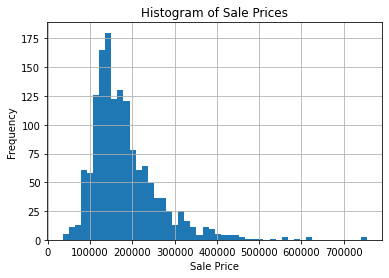

In [8]:
df['SalePrice'].hist(bins=50)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Histogram of Sale Prices')
plt.show() # This will help you identify if the target variable is normally distributed or if it has any outliers.

In [9]:
df = df.drop(['Alley','PoolQC','MiscFeature','Fence','GarageFinish','GarageFinish','Utilities','Condition1','Condition2','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtUnfSF','KitchenQual','KitchenQual','YrSold','SaleType'],axis = 1) 
# Dropping unnecessary columns along with columns having more than 80% null values

In [10]:
df.shape

(1460, 66)

In [11]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0]) # counting number of null values in each column

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtExposure     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageQual       81
GarageCond       81
dtype: int64


In [12]:
num=df._get_numeric_data() 
num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,250000


In [13]:
cat=df.drop(num,axis=1)
cat=cat.astype('category')
cat.head() # Taking numerical columns and categorical columns

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,...,HeatingQC,CentralAir,Electrical,Functional,FireplaceQu,GarageType,GarageQual,GarageCond,PavedDrive,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,NaN,Attchd,TA,TA,Y,Normal
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,1Fam,1Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,2Story,Gable,...,Gd,Y,SBrkr,Typ,Gd,Detchd,TA,TA,Y,Abnorml
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal


In [14]:
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(num) # used simple imputer to fill null values by mean strategy

In [15]:
num1=pd.DataFrame(imputed_data,columns=num.columns)
num1.head() # converting array into dataframe

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,250000.0


Text(0, 0.5, 'SalePrice')

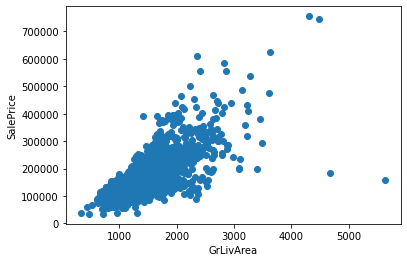

In [23]:
import seaborn as sns
plt.scatter(num1['GrLivArea'], num1['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice') #This will help you identify if there is a linear relationship between these two variables.

Text(0, 0.5, 'Sale Price')

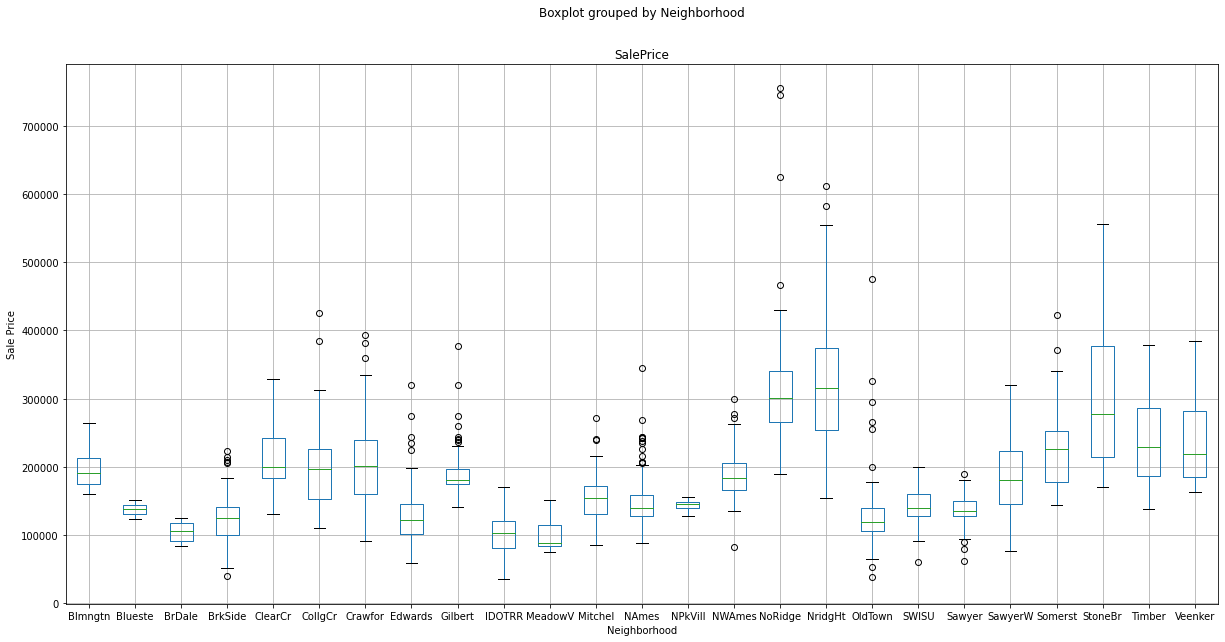

In [24]:
df.boxplot(column='SalePrice', by='Neighborhood', figsize=(20, 10))
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price') #This will help you identify if there are any significant differences in sale prices between neighborhoods.

In [26]:
imputer1 = SimpleImputer(strategy='most_frequent')
imputed_data1 = imputer1.fit_transform(cat)
# used simple imputer to fill null values by mode strategy

In [27]:
cat1= pd.DataFrame(imputed_data1,columns=cat.columns)

In [28]:
cat1.head()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,...,HeatingQC,CentralAir,Electrical,Functional,FireplaceQu,GarageType,GarageQual,GarageCond,PavedDrive,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,Gd,Attchd,TA,TA,Y,Normal
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,1Fam,1Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,2Story,Gable,...,Gd,Y,SBrkr,Typ,Gd,Detchd,TA,TA,Y,Abnorml
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal


In [29]:
cat_data=pd.get_dummies(cat1) #get_dummies in pandas creates additional columns in the DataFrame for each unique value 

In [30]:
cat_data=pd.DataFrame(cat_data)
cat_data.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,1,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [31]:
final_df = num1.join(cat_data)

In [32]:
final_df.head(20)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,65.000000,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,1,0,0,1,0,0,0,0,1,0
1,2.0,20.0,80.000000,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,1,0,0,1,0,0,0,0,1,0
2,3.0,60.0,68.000000,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,1,0,0,1,0,0,0,0,1,0
3,4.0,70.0,60.000000,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,1,0,0,1,1,0,0,0,0,0
4,5.0,60.0,84.000000,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,1,0,0,1,0,0,0,0,1,0
5,6.0,50.0,85.000000,14115.0,5.0,5.0,1993.0,1995.0,0.0,732.0,...,1,0,0,1,0,0,0,0,1,0
6,7.0,20.0,75.000000,10084.0,8.0,5.0,2004.0,2005.0,186.0,1369.0,...,1,0,0,1,0,0,0,0,1,0
7,8.0,60.0,70.049958,10382.0,7.0,6.0,1973.0,1973.0,240.0,859.0,...,1,0,0,1,0,0,0,0,1,0
8,9.0,50.0,51.000000,6120.0,7.0,5.0,1931.0,1950.0,0.0,0.0,...,1,0,0,1,1,0,0,0,0,0
9,10.0,190.0,50.000000,7420.0,5.0,6.0,1939.0,1950.0,0.0,851.0,...,1,0,0,1,0,0,0,0,1,0


In [33]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [34]:
final_df.isnull().sum().sum()

0

## Train_Test_split

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
X = final_df.drop(['SalePrice'],axis=1)
y = final_df.drop(X,axis=1)

In [37]:
final_df.shape

(1460, 224)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building For Train Data

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [45]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

In [85]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
y_pred = lin_reg.predict(X_train_2d)

In [86]:
mse = mean_squared_error(y_train,y_pred)
mae = mean_absolute_error(y_train,y_pred)
r2 = r2_score(y_train,y_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("Mean Absolute error:", mae)
print("Mean squared error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute error: 1.926237522115714e-05
Mean squared error: 6.006243585884651e-10
Root Mean Squared Error: 2.450763878035714e-05
R-squared: 1.0


Mean Absolute error: 4.460160024081395e-07
Mean squared error: 3.372273262293332e-13
Root Mean Squared Error: 5.807127742949463e-07
R-squared: 1.0

## For TEST Data

In [78]:
df1 = pd.read_csv("/content/test.csv")

In [79]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [57]:
df1.shape

(1459, 80)

In [58]:
df1.isnull().sum().sum()

7000

In [59]:
null_counts = df1.isnull().sum()
print(null_counts[null_counts > 0])

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [60]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [63]:
df1.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
Id,1.000000,0.004993,0.009930,0.051492,-0.064887,0.009553,-0.058647,-0.079437,-0.021424,-0.045966,...,-0.053865,-0.050941,0.015664,-0.002045,0.020999,-0.025896,0.025566,0.049535,-0.005744,0.143358
MSSubClass,0.004993,1.000000,-0.450505,-0.359537,0.034690,-0.071768,0.040848,0.046319,-0.012186,-0.058775,...,-0.052788,-0.108000,-0.022539,-0.025421,-0.029051,-0.029709,-0.071978,-0.017790,-0.045835,0.011366
LotFrontage,0.009930,-0.450505,1.000000,0.644608,0.182870,-0.092312,0.122356,0.092603,0.251533,0.204621,...,0.336373,0.375581,0.157426,0.179795,0.013340,-0.037487,0.113444,0.134232,0.068161,0.008810
LotArea,0.051492,-0.359537,0.644608,1.000000,0.107989,-0.103402,0.048314,0.036907,0.188691,0.185470,...,0.263398,0.315841,0.158483,0.164815,0.099850,-0.001846,0.088712,0.140494,0.139071,0.005152
OverallQual,-0.064887,0.034690,0.182870,0.107989,1.000000,-0.095874,0.621910,0.591267,0.453991,0.322583,...,0.600831,0.568161,0.270790,0.288367,-0.161339,0.002803,0.022334,-0.012330,0.033784,-0.008764
OverallCond,0.009553,-0.071768,-0.092312,-0.103402,-0.095874,1.000000,-0.361027,0.021668,-0.144261,-0.054720,...,-0.178052,-0.156769,0.043058,-0.103783,0.072178,0.071285,0.033146,-0.037191,0.007236,-0.009767
YearBuilt,-0.058647,0.040848,0.122356,0.048314,0.621910,-0.361027,1.000000,0.631696,0.312404,0.309595,...,0.538428,0.482497,0.233889,0.208040,-0.363012,-0.005442,-0.031984,-0.001060,0.007325,0.015599
YearRemodAdd,-0.079437,0.046319,0.092603,0.036907,0.591267,0.021668,0.631696,1.000000,0.213937,0.175219,...,0.431442,0.382034,0.230724,0.258049,-0.243582,0.025823,-0.053761,-0.034862,0.003011,0.011771
MasVnrArea,-0.021424,-0.012186,0.251533,0.188691,0.453991,-0.144261,0.312404,0.213937,1.000000,0.343267,...,0.358488,0.375182,0.172721,0.163666,-0.112814,0.005772,0.069339,-0.005395,0.105723,0.005118
BsmtFinSF1,-0.045966,-0.058775,0.204621,0.185470,0.322583,-0.054720,0.309595,0.175219,0.343267,1.000000,...,0.285959,0.323800,0.242369,0.136321,-0.097441,0.088241,0.131414,0.012089,0.165403,0.013397


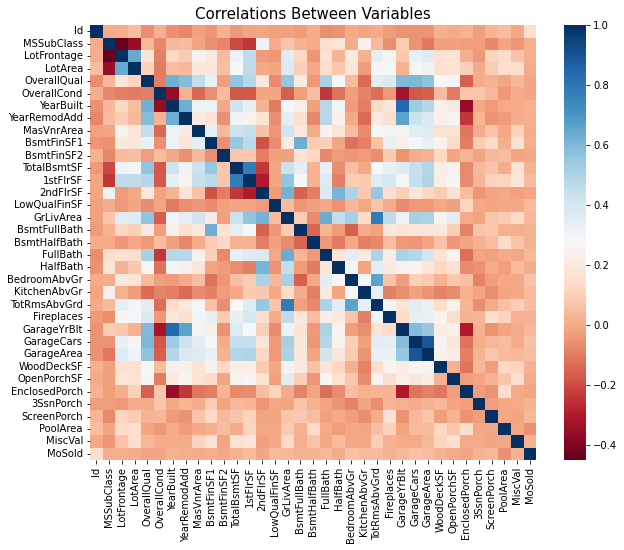

In [64]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [61]:
df1 = df1.drop(['Alley','PoolQC','MiscFeature','Fence','GarageFinish','GarageFinish','Utilities','Condition1','Condition2','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtUnfSF','KitchenQual','KitchenQual','YrSold','SaleType'],axis = 1)

In [62]:
num_cols=df1._get_numeric_data() 
num_cols.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,1.0,730.0,140,0,0,0,120,0,0,6
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,1.0,312.0,393,36,0,0,0,0,12500,6
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,2.0,482.0,212,34,0,0,0,0,0,3
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,2.0,470.0,360,36,0,0,0,0,0,6
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,2.0,506.0,0,82,0,0,144,0,0,1


In [65]:
cat_cols=df1.drop(num_cols,axis=1)
cat_cols=cat_cols.astype('category')
cat_cols.head()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,...,HeatingQC,CentralAir,Electrical,Functional,FireplaceQu,GarageType,GarageQual,GarageCond,PavedDrive,SaleCondition
0,RH,Pave,Reg,Lvl,Inside,Gtl,NAmes,1Fam,1Story,Gable,...,TA,Y,SBrkr,Typ,NaN,Attchd,TA,TA,Y,Normal
1,RL,Pave,IR1,Lvl,Corner,Gtl,NAmes,1Fam,1Story,Hip,...,TA,Y,SBrkr,Typ,NaN,Attchd,TA,TA,Y,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,Gilbert,1Fam,2Story,Gable,...,Gd,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal
3,RL,Pave,IR1,Lvl,Inside,Gtl,Gilbert,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,Gd,Attchd,TA,TA,Y,Normal
4,RL,Pave,IR1,HLS,Inside,Gtl,StoneBr,TwnhsE,1Story,Gable,...,Ex,Y,SBrkr,Typ,NaN,Attchd,TA,TA,Y,Normal


In [66]:
imputer = SimpleImputer(strategy='mean')
test_impute = imputer.fit_transform(num_cols)

In [67]:
numer_cols=pd.DataFrame(test_impute,columns=num_cols.columns)
numer_cols.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,1461.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,...,1.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0
1,1462.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,...,1.0,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0
2,1463.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,...,2.0,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0
3,1464.0,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,...,2.0,470.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0
4,1465.0,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,...,2.0,506.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0


In [68]:
imputer1 = SimpleImputer(strategy='most_frequent')
test_cat_impute = imputer1.fit_transform(cat_cols)

In [69]:
categ_cols= pd.DataFrame(test_cat_impute,columns=cat_cols.columns)

In [70]:
cat_data=pd.get_dummies(categ_cols)

In [71]:
cat_data.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [72]:
cat_data=pd.DataFrame(cat_data)
cat_data.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [73]:
test_df = numer_cols.join(cat_data)

In [74]:
test_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,...,1,0,0,1,0,0,0,0,1,0
1,1462.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,...,1,0,0,1,0,0,0,0,1,0
2,1463.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,...,1,0,0,1,0,0,0,0,1,0
3,1464.0,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,...,1,0,0,1,0,0,0,0,1,0
4,1465.0,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,...,1,0,0,1,0,0,0,0,1,0


## Model Buliding For Test Data

In [89]:
poly = PolynomialFeatures(degree=2)
X_test_poly = poly.fit_transform(X_test)

In [90]:
lin_reg = LinearRegression()
lin_reg.fit(X_test_poly, y_test)

LinearRegression()

In [92]:
Y_pred = lin_reg.predict(X_test_poly)

In [95]:
df3 = lin_reg.predict(poly_reg.fit_transform(X_test))
df3

array([[154499.99999952],
       [325000.00000015],
       [115000.00000098],
       [159000.00000107],
       [315499.9999996 ],
       [ 75500.00000092],
       [311499.99999979],
       [146000.00000114],
       [ 84499.9999999 ],
       [135499.99999954],
       [144999.99999981],
       [130000.00000034],
       [ 81000.00000002],
       [213999.99999942],
       [181000.00000022],
       [134500.00000091],
       [183500.00000043],
       [134999.99999991],
       [118399.99999989],
       [225999.99999916],
       [154999.99999959],
       [209999.99999935],
       [173500.00000011],
       [128999.99999932],
       [191999.99999954],
       [153900.00000011],
       [181134.00000092],
       [141000.00000042],
       [181000.00000017],
       [208899.99999954],
       [127000.0000008 ],
       [284000.0000004 ],
       [200500.        ],
       [135749.99999957],
       [254999.99999954],
       [140000.00000093],
       [137999.99999951],
       [219500.00000022],
       [3099

In [93]:
mse = mean_squared_error(y_test,Y_pred)
mae = mean_absolute_error(y_test,Y_pred)
r2 = r2_score(y_test,Y_pred)
rmse = np.sqrt(mean_squared_error(y_test, Y_pred))
print("Mean Absolute error:", mae)
print("Mean squared error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute error: 4.460160024081395e-07
Mean squared error: 3.372273262293332e-13
Root Mean Squared Error: 5.807127742949463e-07
R-squared: 1.0
